# Data Cleansing Data Indeks Standar Pencemaran Udara (ISPU) di Stasiun Pemantau Kualitas Udara (SPKU) DKI JAKARTA Tahun 2010 -2021
---

Created by : Diaz Jubairy Prabowo  
Source : https://data.jakarta.go.id
___

### CONTENTS :
- Mengatur Direktori Kerja
    - membaca file yang sudah digabung
- Data Cleansing
    - Eksplorasi Dataset untuk Membersihkan Data
        - Drop Kolom-Kolom Kosong
        - Eksplorasi data null dan Format Data
            - Melihat jumlah dan Persentase Missing Values 
            - Visualisasi Missing Values / Null Values
            - Mengecek Keseragaman Isi dan Format Penulisan Data
            - Menghandle Ketidakseragaman isi Data dan Format Data

In [189]:
# import library yg akan digunakan

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno


# Mengatur Direktori Kerja Folder yang akan digunakan

In [190]:
# mengecek direktori file yang saat ini digunakan

print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\Diaz\Documents\Project Data ISPU SPKU DKI JAKARTA 2010 - 2021\File Gabungan ISPU di SPKU 2010 - 2021


In [191]:
# mengubah direktori file yang akan digunakan
# catatan : gunakan pemisah '/'

change_directory = "C:/Users/Diaz/Documents"

os.chdir(change_directory)
print("Current Working directory has been changed to :", change_directory)

Current Working directory has been changed to : C:/Users/Diaz/Documents


In [192]:
# mengubah direktori file ke folder yang baru dibuat

change_directory = "C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021/File Gabungan ISPU di SPKU 2010 - 2021"

os.chdir(change_directory)
print("Current Working directory has been changed to :", change_directory)

Current Working directory has been changed to : C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021/File Gabungan ISPU di SPKU 2010 - 2021


## Membaca data yang sudah digabung

In [193]:
# membaca file yang gabungan 'master_file_ispu.csv' dalam bentuk pandas dataframe
# mengubah kolom "tanggal" menjadi tipe data tanggal

df = pd.read_csv(
                 "master_file_ispu.csv", 
                 delimiter=',', 
                 parse_dates=['tanggal']
                )

df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,kategori
0,2010-08-01,DKI1 (Bunderan HI),48,12,19,47,25,48.0,PM10,BAIK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-08-02,DKI1 (Bunderan HI),57,15,36,57,29,57.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-08-03,DKI1 (Bunderan HI),61,13,31,48,17,61.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-08-04,DKI1 (Bunderan HI),---,---,---,---,---,0.0,NaN,TIDAK ADA DATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-08-05,DKI1 (Bunderan HI),76,16,---,56,26,76.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,---,4,30,9,67,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21811,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,---,9,22,18,78,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21812,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,---,5,26,14,64,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21813,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,---,11,34,19,87,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


terlihat terdapat *21815 rows × 27 columns* dan data sudah tergabung menjadi satu hanya saja data belum bersih dan masih berantakan atau acak tidak berututan (data timeseries harus berurutan), terjadi penambahan banyak kolom kosong dan perlu dilakukan eksplorasi lebih lanjut hal-hal apa saja yang perlu dilakukan agar data mejadi bersih dan siap pakai.

selanjutnya akan dilakukan proses data cleansing agar data menjadi bersih, terstruktur, urut, dan terformat sesuai dengan data yang seharusnya sehingga data siap dipakai untuk dianalisis atau dibuat visualisasi data.

# Data Cleansing
##  Eksplorasi dataset untuk membersihkan data

In [194]:
# melihat jumlah baris non-null dan jumlah kolom, 
# melihat nama baris dan kolom, melihat index, tipe data, dan dimensi (shape) dari dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      21610 non-null  datetime64[ns]
 1   stasiun      21305 non-null  object        
 2   pm10         21559 non-null  object        
 3   so2          21400 non-null  object        
 4   co           21549 non-null  object        
 5   o3           21500 non-null  object        
 6   no2          21511 non-null  object        
 7   max          21578 non-null  object        
 8   critical     19236 non-null  object        
 9   categori     21451 non-null  object        
 10  pm25         1458 non-null   object        
 11  s02          143 non-null    float64       
 12  keterangan   150 non-null    object        
 13  location     305 non-null    object        
 14  Unnamed: 10  0 non-null      float64       
 15  Unnamed: 11  0 non-null      float64       
 16  Unna

terlihat bahwa terdapat kolom kosong dari index 14 sampai 25, hal ini kemungkinan terjadi dikarenakan pada proses data entry terdapat kolom-kolom kosong yang terikut secara tidak sengaja, lalu terakumulasi saat dilakukan penggabungan file .csv sehingga terbaca oleh pandas dan munculah kolom-kolom kosong seperti diatas. Kita dapat menghapus (drop) kolom-kolom tersebut 

## Drop Kolom-Kolom Kosong

In [195]:
# karena data di kolom dengan index 14 sampai dengan 25 tidak memiliki value, maka akan di-drop / dihapus
# membuat variabel dengan range dalam bentuk list dari 13 sampai 25

delete = list(range(13,26))
delete

# drop kolom pada index yang ada di variabel delete

df = df.drop(df.columns[delete], axis=1)
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,kategori
0,2010-08-01,DKI1 (Bunderan HI),48,12,19,47,25,48.0,PM10,BAIK,NaN,NaN,NaN,NaN
1,2010-08-02,DKI1 (Bunderan HI),57,15,36,57,29,57.0,PM10,SEDANG,NaN,NaN,NaN,NaN
2,2010-08-03,DKI1 (Bunderan HI),61,13,31,48,17,61.0,PM10,SEDANG,NaN,NaN,NaN,NaN
3,2010-08-04,DKI1 (Bunderan HI),---,---,---,---,---,0.0,NaN,TIDAK ADA DATA,NaN,NaN,NaN,NaN
4,2010-08-05,DKI1 (Bunderan HI),76,16,---,56,26,76.0,PM10,SEDANG,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,---,4,30,9,67,PM25,SEDANG,67,NaN,NaN,NaN
21811,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,---,9,22,18,78,PM25,SEDANG,78,NaN,NaN,NaN
21812,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,---,5,26,14,64,PM25,SEDANG,64,NaN,NaN,NaN
21813,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,---,11,34,19,87,PM25,SEDANG,87,NaN,NaN,NaN


kolom-kolom kosong sudah terhapus dari dataframe

##  Eksplorasi Data Null
## Melihat jumlah dan Persentase Missing Values / Data Null

In [196]:
# Melihat jumlah data null pada masing-masing kolom
print("Jumlah null value pada masing-masing kolom :")
count_null_values = df.isnull().sum()
print(count_null_values)
print("\n")

# melihat data null dalam bentuk persentase pada masing-masing kolom
print("Persentase null value pada masing-masing kolom :")
null_value_percentage = df.isnull().mean().round(4)*100
print(null_value_percentage)

Jumlah null value pada masing-masing kolom :
tanggal         205
stasiun         510
pm10            256
so2             415
co              266
o3              315
no2             304
max             237
critical       2579
categori        364
pm25          20357
s02           21672
keterangan    21665
kategori      21660
dtype: int64


Persentase null value pada masing-masing kolom :
tanggal        0.94
stasiun        2.34
pm10           1.17
so2            1.90
co             1.22
o3             1.44
no2            1.39
max            1.09
critical      11.82
categori       1.67
pm25          93.32
s02           99.34
keterangan    99.31
kategori      99.29
dtype: float64


## Visualisasi Missing Values / Null Values

In [197]:
# library untuk membantu memvisualisasikan missing values 

import missingno as msno

<AxesSubplot:>

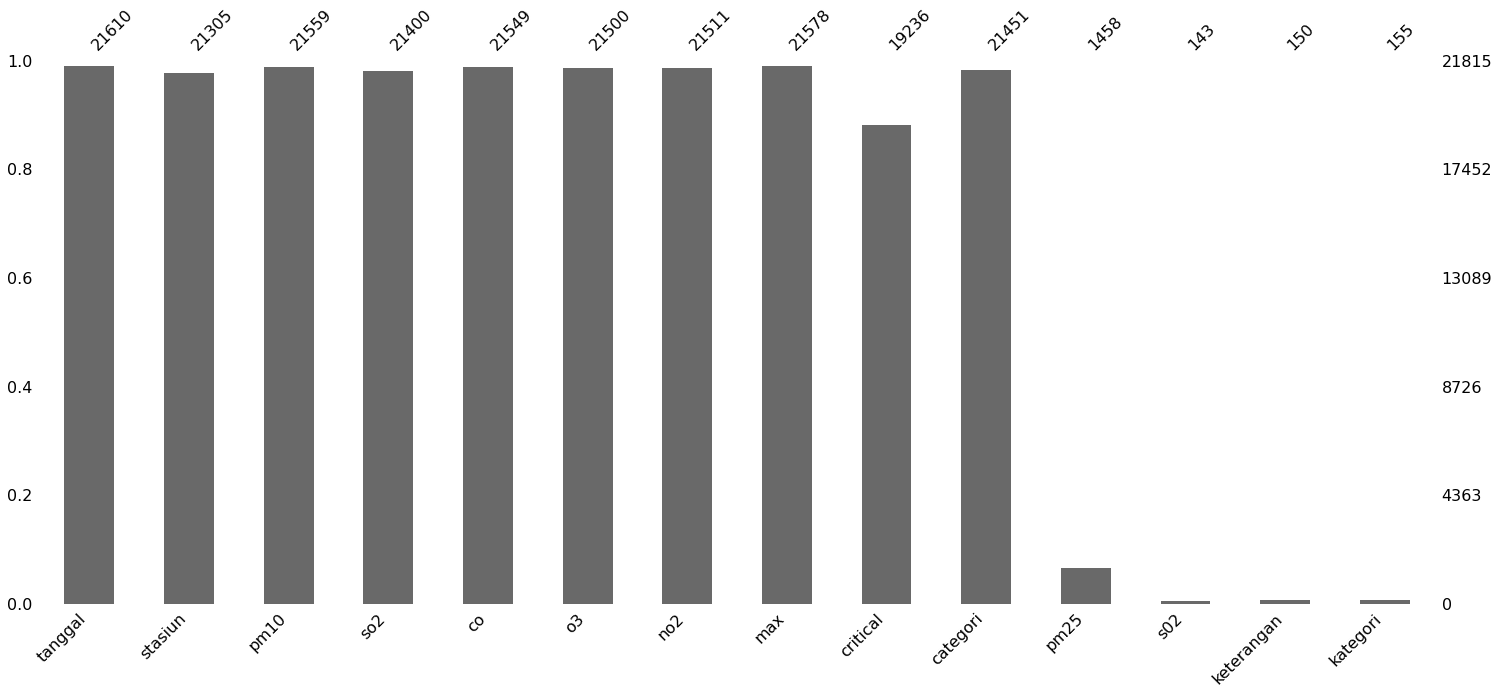

In [198]:
# melihat jumlah data pada masing-masing kolom dalam bentuk bar chart

msno.bar(df)

<AxesSubplot:>

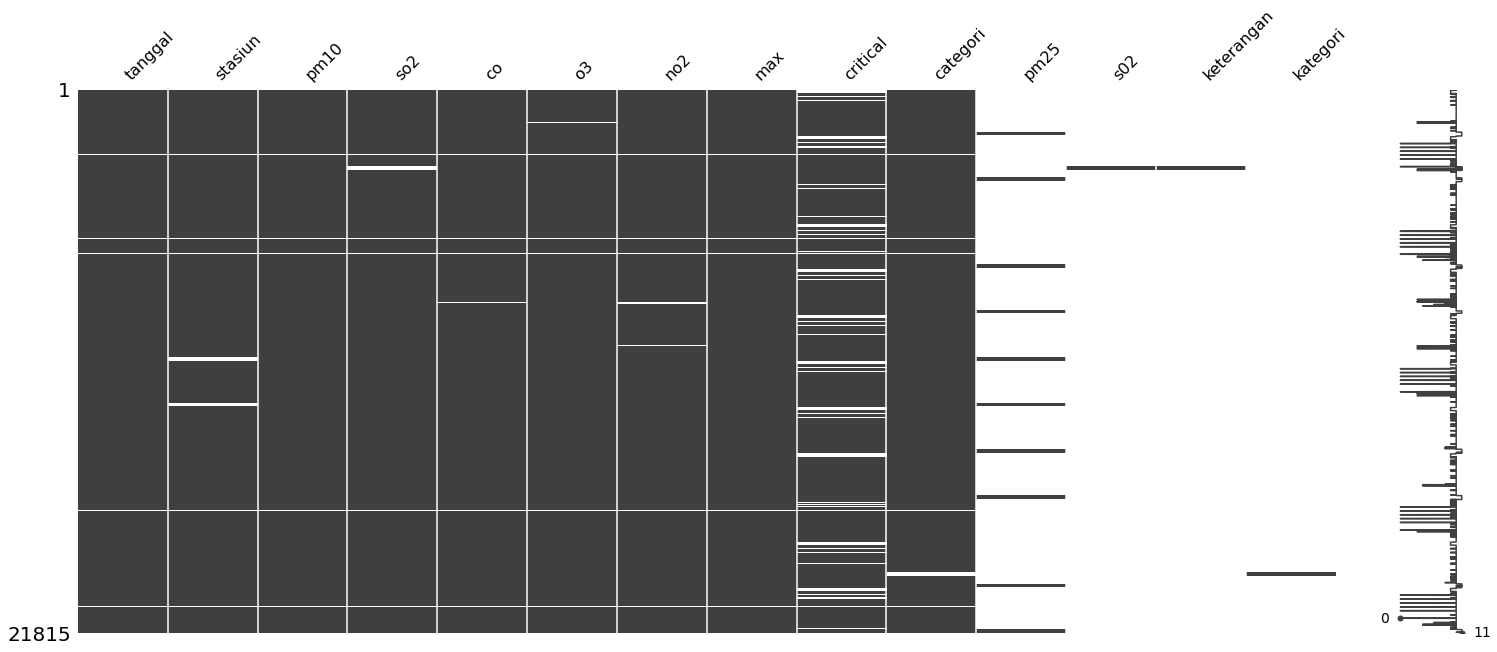

In [199]:
# melihat matrix missing values
# warna putih dan garis putih menunjukan data yang kosong atau hilang

msno.matrix(df)

<AxesSubplot:>

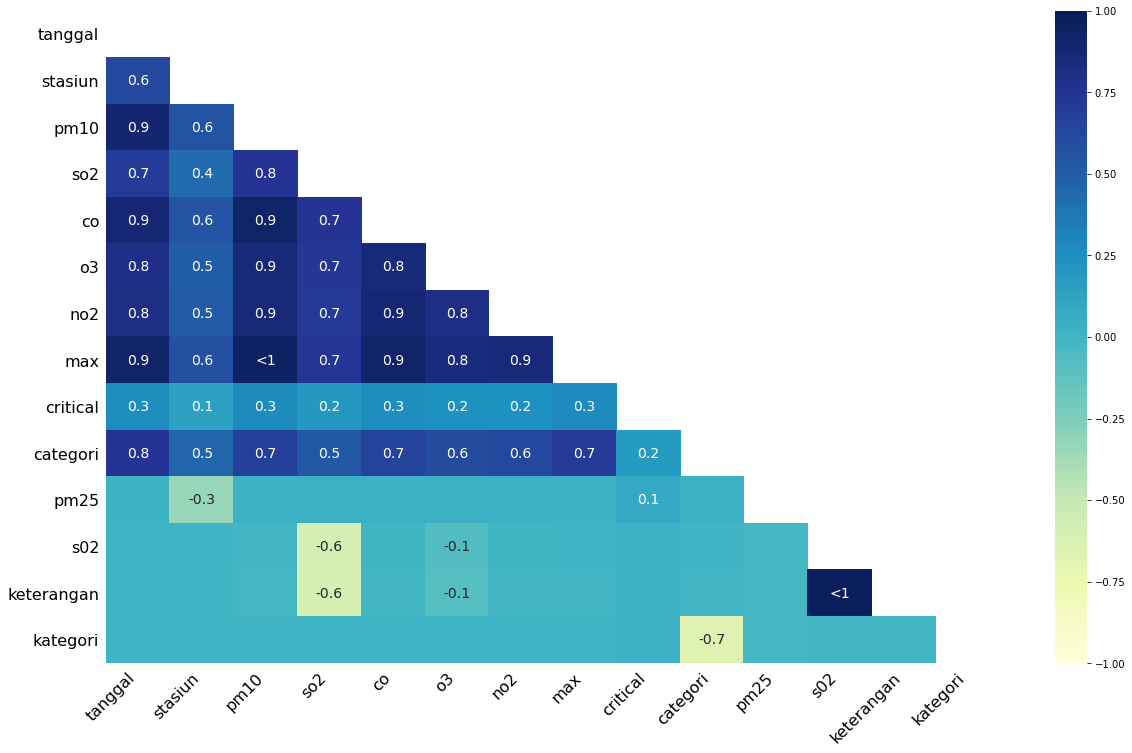

In [200]:
# Corelation heatmap untuk data null mengukur korelasi data null antara satu kolom dengan kolom lainnya dari suatu dataset 
# menunjukkan seberapa kuat ada atau tidak adanya satu fitur atau kolom mempengaruhi kolom yang lain.
# -1 means if one column(variable) is present, the other is almost certainly absent (strong negative correlation)
# 0 means there is no dependence between the columns (variables)
# 1 means if one column(variable) is present, the other is also certainly present (strong positive correlation)

msno.heatmap(df, cmap='YlGnBu')

terlhat jelas bahwa terdapat sejumlah besar data null secara signifikan pada kolom :
- critical
- pm25         
- s02          
- keterangan  
- kategori

Perlu diselidiki kenapa bisa terdapat banyak data null pada kolom-kolom tersebut, terdapat kisaran dari 11 sampai 99 persen data null. Di kolom lain hanya terdapat sedikit data null di kisaran 1 sampai 2 persen dari total data pada masing-masing kolom.

Secara visual data pada kolom "critical" tersebar secara acak dan data pada kolom "pm25" juga tersebar secara acak walaupun data pada kolom 'pm25' lebih banyak data yang kosong. Kita harus lebih lanjut memastikan apakah data tersebar secara acak atau tidak karena data belum disorting secara runut sesuai tanggal, tetapi ada cara lain untuk melihatnya dengan cara melihat ketergantungan / korelasi data yang hilang pada suatu kolom dengan kolom lainnya menggunakan heatmap 

Sedangkan data pada kolom "s02", "keterangan", dan "kategori" datanya yang tidak null terkelompok hanya di satu bagian dan sisanya data kosong.

Dari website https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021 penjelasan untuk masing-masing variabel adalah sebagai berikut :

| No. | Kolom | Deskripsi |
| :- | -: | :-: |
| 1. | tanggal | Tanggal pengukuran kualitas udara |
| 2. | stasiun | Lokasi pengukuran di stasiun |
| 3. | pm10 | Partikulat salah satu parameter yang diukur |
| 4. | pm25 | Partikulat salah satu parameter yang diukur |
| 5. | so2 | Sulfida (dalam bentuk SO2) salah satu parameter yang diukur |
| 6. | co | Carbon Monoksida salah satu parameter yand diukur |
| 7. | o3 | Ozon salah satu parameter yang diukur |
| 8. | no2 | Nitrogen dioksida salah satu parameter yang diukur |
| 9. | max | Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama |
| 10. | critical | Parameter yang hasil pengukurannya paling tinggi |
| 11. | categori | Kategori hasil perhitungan indeks standar pencemaran udara |

tidak ada kolom dengan nama :
- pm25         
- s02          
- keterangan  
- kategori

tetapi di website https://data.jakarta.go.id/dataset?q=ispu untuk hasil pencarian ispu, dari tahun 2010 sampai 2020 tidak terdapat parameter polutan "pm25". "pm25" hanya terdapat di tahun 2021. "pm25" sebenarnya adalah pm2.5 (particulat matter 2.5) yaitu zat polutan yg ukuranya dibawah 2.5 mikron, lebih kecil dibanding pm10 (particulat matter 10) yang besarnya dibawah 10 mikron. Variabel pm2.5 baru ditambahkan pada tahun 2021. nanti akan lebih dieksplore variabel "pm25" ini, apakah akan didrop atau tetap digunakan.

pada penjelasan dari masing-masing kolom / variabel (metadata) di website, kemungkinan kolom ini adalah kolom yang salah penulisan yang padahal adalah kolom yg ada di penjelasan. 
- seperti kolom "s02" adalah kolom "so2", terdapat kesalahan penulisan yang harusnya huruf 'o' tetapi malah ditulis angka nol (0), dan ini diperkuat dari heatmap null data yaitu korelasi antara kolom "s02" dan kolom "so2 berkorelasi negatif (-0.6)
- kolom "categori" dan "kategori" juga menunjukan korelasi negatif yaitu (-0.7), dari bar chart jumlah data terlihat lebih banyak data pada kolom dengan nama "categori" dibanding "kategori", kemungkinan ini juga merupakan kesalahan penulisan

kita juga perlu menyelediki korelasi antara "keterangan" dan "so2" (-0.6)

korelasi antara "o3" dengan "so2" dan "keterangan" mendekati nol (tidak ada ketergantungan antara kolom /variabel) yang bisa kita abaikan.

kita akan lihat unique value pada kolom-kolom yang dicurigai memiliki kesalahan penulisan dan pada kolom dengan null values yang banyak.

akan dicek juga unique values pada kolom yang lain.

## Mengecek Keseragaman Isi dan Format Penulisan Data

In [201]:
# mengecek unique valus yang terdapat pada kolom "s02", "so2", "categori", "kategori", "keterangan"

unique_val_col_check = ["s02", "so2", "categori", "kategori", "keterangan"]         
unique_val_col_check

for i in unique_val_col_check:
        print(i)
        print("Data types :", df[i].dtypes)
        print(df[i].unique())
        print("\n")

s02
Data types : float64
[nan 22. 24. 23. 25. 27. 26. 28. 37. 29. 31. 33. 36. 14. 11.  7. 12.  9.
 13. 15. 18. 16. 21. 20. 17. 58. 56. 10. 19. 30.]


so2
Data types : object
['12' '15' '13' '---' '16' '17' '14' '18' '19' '23' '10' '11' '20' '9' '5'
 '6' '7' '27' '33' '25' '26' '31' '32' '22' '21' '29' '24' '45' '28' '8'
 '4' '37' '38' '42' '40' '30' '3' '2' '1' '35' '34' '36' '39' '46' '43'
 '47' '51' '50' '52' '10.0' '12.0' '11.0' '17.0' '20.0' '22.0' '30.0'
 '21.0' '23.0' '33.0' '24.0' '18.0' '16.0' nan '28.0' '15.0' '27.0' '19.0'
 '31.0' '32.0' '35.0' '34.0' '37.0' '25.0' '29.0' '53' '55' '58' '48' '54'
 '44' '41' '49' '63' '56' '61' '60' '57' '0' '1.0' '4.0' '3.0' '2.0' '5.0'
 '13.0' '7.0' '8.0' '6.0' '9.0' '26.0' '43.0' '45.0' '44.0' '47.0' '46.0'
 '48.0' '50.0' '49.0' '38.0' '36.0' '40.0' '14.0' '39.0' '72.0' '70.0'
 '52.0' '51.0' '53.0' '54.0' '55.0' '42.0' '41.0' '76' '70' '81' '102'
 '106' '74' '86' '94' '101' '83' '71' '59' '89' '69' '95' '97' '80' '100'
 '66' '79' '108' '91'

Terlihat dari perbandingan unique value :
- antara kolom `s02` dengan `so2` sama-sama bertipe data numerik, semakin menguatkan bahwa kolom `s02` adalah kolom yang salah penulisan, seharusnya `so2`.
- antara kolom `categori`, `kategori`, dan `keterangan` sama-sama memiliki data bersifat klasifikasi ('BAIK', 'SEDANG', 'TIDAK SEHAT,' 'SANGAT TIDAK SEHAT', 'BERBAHAYA', 'TIDAK ADA DATA'), dengan catatan pada kolom `categori` terdapat data yang tidak sesuai, terdapat data polutan ('PM10', 'O3', 'CO', 'SO2', 'PM25') yang harus dieksplor kenapa terdapat data itu.

kemungkinan data-data yang tidak pada tempatnya terjadi karena human error atau karena proses penggabungan file .csv, karena terdapat ketidaksesuaian jumlah kolom dan penamaan nama kolom yang seragam mengakibatkan beberapa data points bergeser

In [202]:
# mengecek unique valus yang terdapat pada kolom "tanggal", "stasiun", "max", "critical"

unique_val_col_check = ["tanggal", "stasiun", "max", "critical", "categori"]         
unique_val_col_check

for i in unique_val_col_check:
        print(i)
        print("Data types :", df[i].dtypes)
        print(df[i].unique())
        print("\n")

tanggal
Data types : datetime64[ns]
['2010-08-01T00:00:00.000000000' '2010-08-02T00:00:00.000000000'
 '2010-08-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']


stasiun
Data types : object
['DKI1 (Bunderan HI)' 'DKI2 (Kelapa Gading)' 'DKI3 (Jagakarsa)'
 'DKI4 (Lubang Buaya)' 'DKI5 (Kebon Jeruk)'
 'DKI5 (Kebon Jeruk) Jakarta Barat' nan '45' '34' '59' '56' '35' '36' '37'
 '39' '30' '40' '48' '64' '50' '41' '44' '62' '43' '58' '33' '49' '61'
 '47' '51' '42' '55' '54' '65' '53' '27' '71' '52' '63' '60' '66' '38'
 '---' '32' '74' '76' '70' '89' '69' '101' '57' '73' '78' '22' '24' '25']


max
Data types : object
['48.0' '57.0' '61.0' '0.0' '76.0' '60.0' '80.0' '73.0' '77.0' '63.0'
 '34.0' '27.0' '54.0' '43.0' '53.0' '74.0' '40.0' '44.0' '52.0' '71.0'
 '65.0' '51.0' '45.0' '49.0' '67.0' '70.0' '56.0' '100.0' '99.0' '84.0'
 '85.0' '66.0' '68.0' '62.0' '103.0' '72.0' '133.0' '113.0' '83.0' '165.0'
 '116.0' '168.0' '105

Terlihat dari unique value pada kolom :

- `tanggal` sudah sesuai, datanya berupa tanggal
- `stasiun` terdapat data yang tidak sesuai, seharusnya hanya terdapat data klasifikasi, tetapi di kolom `stasiun` terdapat data numerik.
- `max` sudah berisi data numerik.
- `critical` seharusnya hanya data jenis polutan yang tertinggi, tetapi terdapat jenis data yang tidak sesuai yaitu data numerik.
- `categori` seharusnya hanya berisi jenis data klasifikasi tingkat bahaya polutan, tetapi terdapat data yang tidak sesuai yaitu data nama polutan

In [203]:
# mengecek unique value pada data polutan (pm10, pm25, co, o3, no2)

unique_val_col_check = ["pm10", "pm25", "so2", "co", "o3", "no2"]         
unique_val_col_check

for i in unique_val_col_check:
        print(i)
        print("Data types :", df[i].dtypes)
        print(df[i].unique())
        print("\n")

pm10
Data types : object
['48' '57' '61' '---' '76' '60' '63' '54' '43' '53' '39' '44' '52' '65'
 '51' '68' '45' '49' '59' '56' '58' '66' '67' '74' '70' '64' '79' '62'
 '72' '71' '69' '73' '83' '80' '77' '92' '81' '84' '78' '75' '110' '95'
 '89' '119' '115' '134' '118' '127' '86' '100' '136' '171' '138' '113'
 '146' '126' '105' '116' '98' '41' '11' '8' '9' '6' '12' '32' '33' '7'
 '15' '36' '13' '34' '93' '47' '42' '30' '27' '38' '46' '50' '35' '37'
 '24' '123' '103' '101' '139' '97' '140' '114' '121' '132' '94' '99' '166'
 '109' '85' '128' '149' '106' '55' '25' '26' '17' '20' '22' '28' '21' '23'
 '19' '14' '87' '91' '82' '88' '40' '29' '108' '16' '96' '31' '107' '5'
 '18' '76.0' '53.0' '57.0' '56.0' '46.0' '48.0' '64.0' '72.0' '60.0'
 '69.0' '62.0' '63.0' '74.0' '59.0' '55.0' '54.0' '68.0' '67.0' '70.0'
 '49.0' '65.0' '79.0' nan '52.0' '58.0' '73.0' '61.0' '75.0' '21.0' '16.0'
 '15.0' '27.0' '43.0' '37.0' '28.0' '11.0' '19.0' '32.0' '30.0' '66.0'
 '86.0' '71.0' '92.0' '77.0' '80.0' '81

terlihat dari isi unique value pada kolom :
- `pm10` terdapat data yang tidak sesuai yaitu terdapat data nama stasiun yang seharusnya data pada kolom pm10 bersifat numerik
- `pm25` sudah sesuai yaitu data numerik
- `so2` sudah sesuai yaitu data numerik
- `co` sudah sesuai yaitu data numerik
- `o3` sudah sesuai yaitu data numerik
- `no2` sudah sesuai yaitu data numerik

dari keseluruhan kolom terdapat juga penulisan data kosong dengan cara penulisan seperti ini '---', kita akan ganti menjadi nan values agar terdeteksi oleh sistem sebagai data kosong, karena apabiola ditulis seperti ini '---' sistem akan mendeteksi bahwa data tersebut bukan missing values tau null values.

In [204]:
df.dtypes

tanggal       datetime64[ns]
stasiun               object
pm10                  object
so2                   object
co                    object
o3                    object
no2                   object
max                   object
critical              object
categori              object
pm25                  object
s02                  float64
keterangan            object
kategori              object
dtype: object

rata-rata data yang bersifat numerik terbaca dalam bentuk tipe data object (string), kita perlu mengubahnya menjadi tipe data numerik (float atau integer) agar kedepannya dapat dilakukan kalkulasi aritmatika apabila diperlukan,tentunya data harus sudah dalam bentuk numerik terlebih dahulu, seperti pda kolom `pm10`, data harus sudah tidak ada data nama stasiun.

data yang bersifat pengukuran atau ilai ukur harus dalam bentuk numerik seperti kolom-kolom jenis polutan dan kolom max harus bertipe data numerik. 

## Menghandle Ketidakseragaman isi Data dan Format Data

In [205]:
# Data Null pada dataframe ditulis dalam betuk string '---' yang seharusnya dalam bentuk nan (not a  number / null values)
# akan dilakukan pengubahan dari '---' menjadi nan

df = df.replace('---', np.NaN)

In [206]:
# mengecek apakah masih terdapat setidaknya satu value '---' di semua kolom
all_column = list(df.columns)

for i in all_column:
    print(i)
    if df.loc[df[i]=="---"].size:
        print("True")
    else:
        print("False")

tanggal
False
stasiun
False
pm10
False
so2
False
co
False
o3
False
no2
False
max
False
critical
False
categori
False
pm25
False
s02
False
keterangan
False
kategori
False


Terlihat bahwa sudah tidak terdapat value penulisan data kosong / missing value atau null value dengan cara penulisan seperti ini '---' di semua kolom.  

In [207]:
# mengecek apakah terdapat penambahan jumlah dan persentase data null karena pengubahann value "---" menjadi nan
display(df.info())
print('---------------------------------------')
display(df.isna().sum())
print('---------------------------------------')
display(df.isnull().mean().round(4)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18544 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21451 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 2.3+ MB


None

---------------------------------------


tanggal         205
stasiun         513
pm10           3346
so2            3271
co             2956
o3             3207
no2            3102
max             238
critical       2579
categori        364
pm25          20375
s02           21672
keterangan    21665
kategori      21660
dtype: int64

---------------------------------------


tanggal        0.94
stasiun        2.35
pm10          15.34
so2           14.99
co            13.55
o3            14.70
no2           14.22
max            1.09
critical      11.82
categori       1.67
pm25          93.40
s02           99.34
keterangan    99.31
kategori      99.29
dtype: float64

Terlihat penambahan jumlah dan persentase null value pada kolom yang sebelumya terdapat "---" yaitu pada `semua kolom jenis polutan`, `stasiun`, dan `max`. Lonjakan signifikan terlihat pada data polutan

Sebelum kita mengubah kolom bertipe data yang tidak sesuai, karena beberapa kolom masih terdapat kolom dengan penulisan yang tidak seragam atau tidak sesuai seperti :
- `pm10` terdapat data yang tidak sesuai yaitu terdapat data nama stasiun yang seharusnya data pada kolom pm10 semua valuenya bersifat numerik atau angka.
- `stasiun` terdapat data yang tidak sesuai, seharusnya hanya terdapat data klasifikasi nama statsiun, tetapi di kolom `stasiun` terdapat data numerik.
- `critical` seharusnya hanya data jenis polutan yang tertinggi atau data klasifikasi, tetapi terdapat jenis data yang tidak sesuai yaitu data numerik.
- `categori` seharusnya hanya berisi jenis data klasifikasi tingkat bahaya polutan, tetapi terdapat data yang tidak sesuai yaitu data nama polutan

maka belum bisa dilakukan pengubahan tipe data, harus kita handle dulu data yang penulisannya tidak sesuai dengan tipe data kolom yang seharusnya. Dari kolom-kolom itu terlihat seperti ada korelasi antar kolom karena kolom yang datanya tidak seragam bersebalahan data yang tidak sesuai saling mengisi

pada data di kolom `pm10` terdapat data nama stasiun yang harusnya milik kolom `stasiun`
sedangkan pada kolom `stasiun` terdapat data numerik yang seharusnya milik kolom `pm10`

pada data di kolom `critical` terdapat data numerik, walaupun kolom sebalah kanannya yaitu `categori` bukan bertipe data numerik, tetapi kolom di sebelah kirinya merupakan kolom numerik yaitu kolom `max`

pada data kolom `categori` yang seharusnya hanya ada data klasifikasi tingkat bahaya polutan, tetapi terdapat data nama polutan yang seharusnya milik kolom `critical` di sebelah kiri kolom `categori`

terlihat seperti ada pergeseran sehingga value yang seharusnya pada kolom yang sesuai, bergeser ke kolom di sebelahnya

## menghandle kolom yang memiliki kesamaan value

seperti yang sudah dibahas sebelumnya, didapat :
- antara kolom `s02` dengan `so2` sama-sama bertipe data numerik, semakin menguatkan bahwa kolom `s02` adalah kolom yang salah penulisan, seharusnya `so2`.
- antara kolom `categori`, `kategori`, dan `keterangan` sama-sama memiliki data bersifat klasifikasi ('BAIK', 'SEDANG', 'TIDAK SEHAT,' 'SANGAT TIDAK SEHAT', 'BERBAHAYA', 'TIDAK ADA DATA'), dengan catatan pada kolom `categori` terdapat data yang tidak sesuai, terdapat data polutan ('PM10', 'O3', 'CO', 'SO2', 'PM25') yang harus dieksplor kenapa terdapat data itu.

In [208]:
# eksplorasi data not-null pada kolom 's02'

df_s02 = df.loc[df['s02'].notnull()]
df_s02

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,NaN,17.0,22.0,1.0,25.0,1.0,PM10,NaN,22.0,BAIK,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,NaN,18.0,24.0,2.0,39.0,1.0,PM10,NaN,22.0,BAIK,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,NaN,27.0,23.0,2.0,45.0,1.0,PM10,NaN,22.0,BAIK,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,NaN,20.0,29.0,3.0,29.0,4.0,O3,NaN,22.0,BAIK,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,NaN,25.0,16.0,4.0,25.0,3.0,CO,NaN,24.0,BAIK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2018-04-25,DKI5 (Kebon Jeruk) Jakarta Barat,61.0,NaN,28.0,35.0,4.0,61.0,1.0,PM10,NaN,16.0,SEDANG,NaN
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,NaN,34.0,56.0,8.0,62.0,1.0,PM10,NaN,30.0,SEDANG,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,NaN,15.0,48.0,4.0,48.0,4.0,O3,NaN,15.0,BAIK,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,NaN,14.0,96.0,5.0,96.0,4.0,O3,NaN,16.0,SEDANG,NaN


In [209]:
# eksplorasi data not-null pada kolom 'keterangan'

df_s02 = df.loc[df['keterangan'].notnull()]
df_s02

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,NaN,17.0,22.0,1.0,25.0,1.0,PM10,NaN,22.0,BAIK,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,NaN,18.0,24.0,2.0,39.0,1.0,PM10,NaN,22.0,BAIK,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,NaN,27.0,23.0,2.0,45.0,1.0,PM10,NaN,22.0,BAIK,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,NaN,20.0,29.0,3.0,29.0,4.0,O3,NaN,22.0,BAIK,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,NaN,25.0,16.0,4.0,25.0,3.0,CO,NaN,24.0,BAIK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,NaN,34.0,56.0,8.0,62.0,1.0,PM10,NaN,30.0,SEDANG,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,NaN,15.0,48.0,4.0,48.0,4.0,O3,NaN,15.0,BAIK,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,NaN,14.0,96.0,5.0,96.0,4.0,O3,NaN,16.0,SEDANG,NaN
3238,2018-04-29,DKI5 (Kebon Jeruk) Jakarta Barat,65.0,NaN,20.0,120.0,5.0,120.0,4.0,O3,NaN,13.0,TIDAK SEHAT,NaN


In [210]:
# eksplorasi data not-null pada kolom 'kategori'

df_s02 = df.loc[df['kategori'].notnull()]
df_s02

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,kategori
19365,2018-10-01,DKI1 (Bunderan HI),47,11,15,26,4,47,PM10,NaN,NaN,NaN,NaN,BAIK
19366,2018-10-02,DKI1 (Bunderan HI),63,11,19,14,4,63,PM10,NaN,NaN,NaN,NaN,SEDANG
19367,2018-10-03,DKI1 (Bunderan HI),37,10,17,33,5,37,PM10,NaN,NaN,NaN,NaN,BAIK
19368,2018-10-04,DKI1 (Bunderan HI),38,11,17,35,4,38,PM10,NaN,NaN,NaN,NaN,BAIK
19369,2018-10-05,DKI1 (Bunderan HI),46,11,16,37,3,46,PM10,NaN,NaN,NaN,NaN,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19515,2018-10-27,DKI5 (Kebon Jeruk) Jakarta Barat,57,26,23,67,11,67,O3,NaN,NaN,NaN,NaN,SEDANG
19516,2018-10-28,DKI5 (Kebon Jeruk) Jakarta Barat,39,21,14,61,NaN,61,O3,NaN,NaN,NaN,NaN,SEDANG
19517,2018-10-29,DKI5 (Kebon Jeruk) Jakarta Barat,27,25,14,66,NaN,66,O3,NaN,NaN,NaN,NaN,SEDANG
19518,2018-10-30,DKI5 (Kebon Jeruk) Jakarta Barat,52,31,14,57,7,57,O3,NaN,NaN,NaN,NaN,SEDANG


-  terlihat bahwa dari ketiga kolom "s02", "keterangan", "kategori" terdapat pola yang sama, yaitu data not-null terkumpul dalam satu periode tertentu secara berurutan, dari awal bulan sampai akhir bulan

-  setiap kolom "s02" yang memiliki data, kolom "so2" selalu null
- setiap kolom "kategori" yang memiliki data, kolom "categori" selalu null
-  setiap kolom "keterangan" yang memiliki data, kolom "kategori" selalu null

-  kita bisa memindahkan data pada kolom "s02" ke kolom "so2"
-  data pada kolom "keterangan", "kategori" ke kolom "categori"
-  setelah dipindahkan atau dicopy datanya, kita hapus / drop kolom "s02", "keterangan", "kategori"

In [211]:
# mengcopy data pada "s02" ke kolom "so2"
df['so2'] = df['so2'].fillna(df['s02'])

# mengecek apakah datanya sudah tercopy dari "s02" ke "so2"
df_s02 = df.loc[df['s02'].notnull()]

display(df_s02)
display(df.info())

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,22,17.0,22.0,1.0,25.0,1.0,PM10,NaN,22.0,BAIK,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,22,18.0,24.0,2.0,39.0,1.0,PM10,NaN,22.0,BAIK,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,22,27.0,23.0,2.0,45.0,1.0,PM10,NaN,22.0,BAIK,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,22,20.0,29.0,3.0,29.0,4.0,O3,NaN,22.0,BAIK,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,24,25.0,16.0,4.0,25.0,3.0,CO,NaN,24.0,BAIK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2018-04-25,DKI5 (Kebon Jeruk) Jakarta Barat,61.0,16,28.0,35.0,4.0,61.0,1.0,PM10,NaN,16.0,SEDANG,NaN
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,30,34.0,56.0,8.0,62.0,1.0,PM10,NaN,30.0,SEDANG,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,15,15.0,48.0,4.0,48.0,4.0,O3,NaN,15.0,BAIK,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,16,14.0,96.0,5.0,96.0,4.0,O3,NaN,16.0,SEDANG,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18687 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21451 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 2.3+ MB


None

In [212]:
df.so2.unique() # check unique value pada kolom "categori"

array(['12', '15', '13', nan, '16', '17', '14', '18', '19', '23', '10',
       '11', '20', '9', '5', '6', '7', '27', '33', '25', '26', '31', '32',
       '22', '21', '29', '24', '45', '28', '8', '4', '37', '38', '42',
       '40', '30', '3', '2', '1', '35', '34', '36', '39', '46', '43',
       '47', '51', '50', '52', '10.0', '12.0', '11.0', '17.0', '20.0',
       '22.0', '30.0', '21.0', '23.0', '33.0', '24.0', '18.0', '16.0',
       '28.0', '15.0', '27.0', '19.0', '31.0', '32.0', '35.0', '34.0',
       '37.0', '25.0', '29.0', '53', '55', '58', '48', '54', '44', '41',
       '49', 22.0, 24.0, 23.0, 25.0, 27.0, 26.0, 28.0, 37.0, 29.0, 31.0,
       33.0, 36.0, 14.0, 11.0, 7.0, 12.0, 9.0, 13.0, 15.0, 18.0, 16.0,
       21.0, 20.0, 17.0, 58.0, 56.0, 10.0, 19.0, 30.0, '63', '56', '61',
       '60', '57', '0', '1.0', '4.0', '3.0', '2.0', '5.0', '13.0', '7.0',
       '8.0', '6.0', '9.0', '26.0', '43.0', '45.0', '44.0', '47.0',
       '46.0', '48.0', '50.0', '49.0', '38.0', '36.0', '40.0', '14.

- kolom so2 sudah memiliki data bertipe numerik untuk semua valuenya
- terlihat data pada kolom "s02" sudah tercopy ke kolom "so2"
- terlihat penambahan jumlah data pada kolom "so2"
- data "so2" + data "s02"
- 18544 + 143 = 18687
- data "so2" menjadi 18687

In [213]:
# mengcopy data pada "kategori" ke kolom "categori"
df['categori'] = df['categori'].fillna(df['kategori'])

# mengecek apakah datanya sudah tercopy dari "kategori" ke kolom "categori"
df_kategori = df.loc[df['kategori'].notnull()]
df_kategori

display(df_kategori)
display(df.info())

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,kategori
19365,2018-10-01,DKI1 (Bunderan HI),47,11,15,26,4,47,PM10,BAIK,NaN,NaN,NaN,BAIK
19366,2018-10-02,DKI1 (Bunderan HI),63,11,19,14,4,63,PM10,SEDANG,NaN,NaN,NaN,SEDANG
19367,2018-10-03,DKI1 (Bunderan HI),37,10,17,33,5,37,PM10,BAIK,NaN,NaN,NaN,BAIK
19368,2018-10-04,DKI1 (Bunderan HI),38,11,17,35,4,38,PM10,BAIK,NaN,NaN,NaN,BAIK
19369,2018-10-05,DKI1 (Bunderan HI),46,11,16,37,3,46,PM10,BAIK,NaN,NaN,NaN,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19515,2018-10-27,DKI5 (Kebon Jeruk) Jakarta Barat,57,26,23,67,11,67,O3,SEDANG,NaN,NaN,NaN,SEDANG
19516,2018-10-28,DKI5 (Kebon Jeruk) Jakarta Barat,39,21,14,61,NaN,61,O3,SEDANG,NaN,NaN,NaN,SEDANG
19517,2018-10-29,DKI5 (Kebon Jeruk) Jakarta Barat,27,25,14,66,NaN,66,O3,SEDANG,NaN,NaN,NaN,SEDANG
19518,2018-10-30,DKI5 (Kebon Jeruk) Jakarta Barat,52,31,14,57,7,57,O3,SEDANG,NaN,NaN,NaN,SEDANG


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18687 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21606 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 2.3+ MB


None

- terlihat data pada kolom "Kategori" sudah tercopy ke kolom "categori"
- terlihat penambahan jumlah data pada kolom "categori"
- data "categori" + data "Kategori"
- 21451 + 155 = 21606
- data "categori" menjadi 21606

In [214]:
# mengcopy data pada "keterangan" ke kolom "categori"
df['categori'] = df['categori'].fillna(df['keterangan'])

# mengecek apakah datanya sudah tercopy
df_keterangan = df.loc[df['keterangan'].notnull()]
df_keterangan

display(df_keterangan)
display(df.info())

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,22,17.0,22.0,1.0,25.0,1.0,PM10,NaN,22.0,BAIK,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,22,18.0,24.0,2.0,39.0,1.0,PM10,NaN,22.0,BAIK,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,22,27.0,23.0,2.0,45.0,1.0,PM10,NaN,22.0,BAIK,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,22,20.0,29.0,3.0,29.0,4.0,O3,NaN,22.0,BAIK,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,24,25.0,16.0,4.0,25.0,3.0,CO,NaN,24.0,BAIK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,30,34.0,56.0,8.0,62.0,1.0,PM10,NaN,30.0,SEDANG,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,15,15.0,48.0,4.0,48.0,4.0,O3,NaN,15.0,BAIK,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,16,14.0,96.0,5.0,96.0,4.0,O3,NaN,16.0,SEDANG,NaN
3238,2018-04-29,DKI5 (Kebon Jeruk) Jakarta Barat,65.0,13,20.0,120.0,5.0,120.0,4.0,O3,NaN,13.0,TIDAK SEHAT,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18687 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21609 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 2.3+ MB


None

- ternyata belum tercopy semua dikarenakan pada kolom categori ketika difilter berdasarkan kolom keterangan yang tidak null, sebagian besar data pada kolom categori tidak null, metode copy sebelumnya hanya berfungsi apabila data tujuan copy tidak ada data null/Nan, sehingga perlu dilakukan metode lain

In [215]:
# menggunakan fungsi loc untuk mengcopy, 
# kita gunakan bantuan indeks untuk mengubah row mana yang ingin dicopy
df.loc[3090:3239,'categori'] = df['keterangan']

# mengecek apakah datanya sudah tercopy
df_keterangan = df.loc[df['keterangan'].notnull()]
df_keterangan

display(df_keterangan)
display(df.info())


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,22,17.0,22.0,1.0,25.0,1.0,BAIK,NaN,22.0,BAIK,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,22,18.0,24.0,2.0,39.0,1.0,BAIK,NaN,22.0,BAIK,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,22,27.0,23.0,2.0,45.0,1.0,BAIK,NaN,22.0,BAIK,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,22,20.0,29.0,3.0,29.0,4.0,BAIK,NaN,22.0,BAIK,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,24,25.0,16.0,4.0,25.0,3.0,BAIK,NaN,24.0,BAIK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,30,34.0,56.0,8.0,62.0,1.0,SEDANG,NaN,30.0,SEDANG,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,15,15.0,48.0,4.0,48.0,4.0,BAIK,NaN,15.0,BAIK,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,16,14.0,96.0,5.0,96.0,4.0,SEDANG,NaN,16.0,SEDANG,NaN
3238,2018-04-29,DKI5 (Kebon Jeruk) Jakarta Barat,65.0,13,20.0,120.0,5.0,120.0,4.0,TIDAK SEHAT,NaN,13.0,TIDAK SEHAT,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18687 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21609 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 2.3+ MB


None

In [216]:
df.categori.unique() # check unique value pada kolom "categori"

array(['BAIK', 'SEDANG', 'TIDAK ADA DATA', 'TIDAK SEHAT',
       'SANGAT TIDAK SEHAT', nan, 'PM25', 'SO2', 'PM10', 'O3',
       'BERBAHAYA'], dtype=object)

- terlihat data pada kolom "Keterangan" sudah tercopy ke kolom "categori"
- tidak terlihat penambahan jumlah data pada kolom "categori" karena bukan mengisi nan value tapi menggantikan data pada range indeks yang dipilih pada kolom "categori"
- masih terdapat value yang tidak sesuai pada tempatnya ('PM25', 'SO2', 'PM10', 'O3'), akan dieksplor lebih jauh dan disesuaikan dengan kolom "categori"

karena kolom "s02" "keterangan" "kategori" sudah tidak digunakan maka akan di-drop

In [217]:
df = df.drop(['s02', 'keterangan', 'kategori'], axis = 1)
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
0,2010-08-01,DKI1 (Bunderan HI),48,12,19,47,25,48.0,PM10,BAIK,NaN
1,2010-08-02,DKI1 (Bunderan HI),57,15,36,57,29,57.0,PM10,SEDANG,NaN
2,2010-08-03,DKI1 (Bunderan HI),61,13,31,48,17,61.0,PM10,SEDANG,NaN
3,2010-08-04,DKI1 (Bunderan HI),NaN,NaN,NaN,NaN,NaN,0.0,NaN,TIDAK ADA DATA,NaN
4,2010-08-05,DKI1 (Bunderan HI),76,16,NaN,56,26,76.0,PM10,SEDANG,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,NaN,4,30,9,67,PM25,SEDANG,67
21811,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,NaN,9,22,18,78,PM25,SEDANG,78
21812,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,NaN,5,26,14,64,PM25,SEDANG,64
21813,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,NaN,11,34,19,87,PM25,SEDANG,87


In [218]:
# mengecek data dimana terdapat value 'PM25'
print('PM25')
display(df.loc[df['categori']=='PM25'])

print('SO2')
display(df.loc[df['categori']=='SO2'])

print('PM10')
display(df.loc[df['categori']=='PM10'])

print('O3')
display(df.loc[df['categori']=='O3'])

PM25


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
10740,2021-07-01,NaN,DKI1 (Bunderan HI),76,27,14,20,31,76,PM25,55
10741,2021-07-02,NaN,DKI1 (Bunderan HI),70,33,16,14,30,70,PM25,55
10742,2021-07-03,NaN,DKI1 (Bunderan HI),81,33,12,19,25,81,PM25,58
10743,2021-07-04,NaN,DKI1 (Bunderan HI),102,27,11,27,22,102,PM25,68
10744,2021-07-05,NaN,DKI1 (Bunderan HI),106,28,12,34,25,106,PM25,71
...,...,...,...,...,...,...,...,...,...,...,...
12720,2021-06-26,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,70,39,8,16,22,70,PM25,45
12721,2021-06-27,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,120,28,22,17,41,120,PM25,68
12722,2021-06-28,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,99,25,17,21,30,99,PM25,59
12723,2021-06-29,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,128,35,24,21,50,128,PM25,72


SO2


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
10781,2021-07-11,NaN,DKI2 (Kelapa Gading),NaN,54,10,54,13,54,SO2,NaN


PM10


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
10782,2021-07-12,NaN,DKI2 (Kelapa Gading),NaN,52,9,44,13,64,PM10,64
10793,2021-07-23,NaN,DKI2 (Kelapa Gading),NaN,52,9,59,20,61,PM10,61
10813,2021-07-12,NaN,DKI3 (Jagakarsa),NaN,47,4,14,11,50,PM10,50
10830,2021-07-29,NaN,DKI3 (Jagakarsa),28,47,17,26,18,73,PM10,73
10831,2021-07-30,NaN,DKI3 (Jagakarsa),29,51,14,43,21,75,PM10,75
10832,2021-07-31,NaN,DKI3 (Jagakarsa),26,9,18,31,29,57,PM10,57
12663,2021-06-29,NaN,DKI3 (Jagakarsa),30,52,8,25,19,71,PM10,71
12664,2021-06-30,NaN,DKI3 (Jagakarsa),26,49,10,23,19,79,PM10,79
12699,2021-06-05,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,24,15,21,29,57,PM10,57
12700,2021-06-06,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,23,13,25,22,54,PM10,54


O3


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
10801,2021-07-31,NaN,DKI2 (Kelapa Gading),NaN,50,8,65,18,65,O3,63


kita akan lihat sumber aslinya untuk referensi kesalahan apa yang menyebabkan data tidak sesuai pada tempatnya

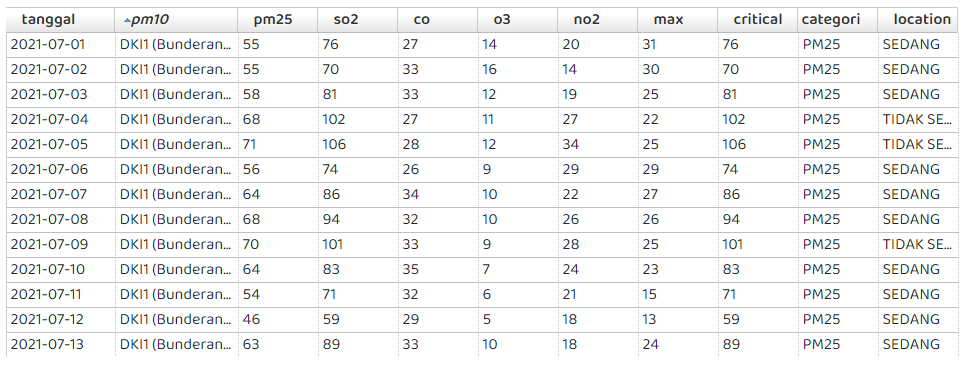

terlihat jelas bahwa memang dari data aslinya penempatan datanya tidak sesuai, tidak terdapat kolom "stasiun", jadi datanya bergeser satu kolom ke kiri, seharusnya yang benar adalah seperti ini 

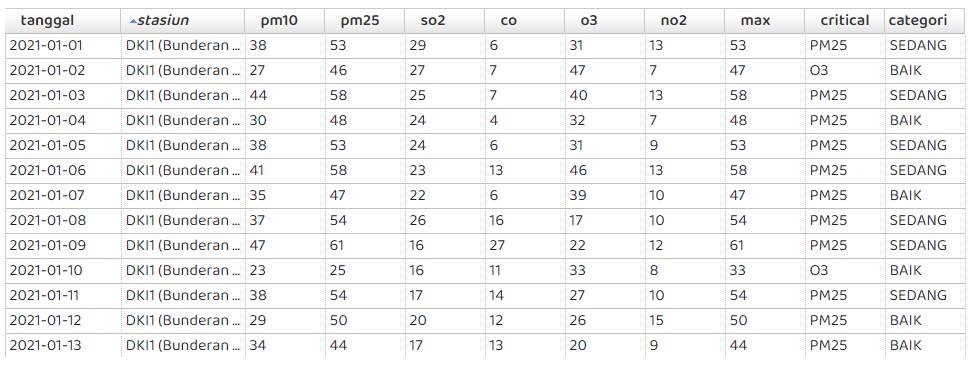

selanjutnya dari dataframe yang telah kita buat, kita akan pindahkan posisi kolom PM25 berada diantara PM10  dan so2 lalu kita akan geser satu kolom ke kiri utuk menyesuaikan data dengan kolom

In [219]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori', 'pm25'],
      dtype='object')

In [220]:
# ubah urutan kolom

old_cols = df.columns.values 
new_cols= ['tanggal', 'stasiun', 'pm10', 'pm25', 
           'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori']
df = df.reindex(columns=new_cols)
print('PM25')
display(df.loc[df['categori']=='PM25'])

PM25


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
10740,2021-07-01,NaN,DKI1 (Bunderan HI),55,76,27,14,20,31,76,PM25
10741,2021-07-02,NaN,DKI1 (Bunderan HI),55,70,33,16,14,30,70,PM25
10742,2021-07-03,NaN,DKI1 (Bunderan HI),58,81,33,12,19,25,81,PM25
10743,2021-07-04,NaN,DKI1 (Bunderan HI),68,102,27,11,27,22,102,PM25
10744,2021-07-05,NaN,DKI1 (Bunderan HI),71,106,28,12,34,25,106,PM25
...,...,...,...,...,...,...,...,...,...,...,...
12720,2021-06-26,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,45,70,39,8,16,22,70,PM25
12721,2021-06-27,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,68,120,28,22,17,41,120,PM25
12722,2021-06-28,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,59,99,25,17,21,30,99,PM25
12723,2021-06-29,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,72,128,35,24,21,50,128,PM25


In [221]:
# memperbaiki urutan data yang bergeser ke kanan, agar digeser satu persatu ke kiri untuk data PM25

df.loc[10740:12724,'stasiun'] = df['pm10'];
df.loc[10740:12724,'pm10'] = df['pm25'];
df.loc[10740:12724,'pm25'] = df['so2'];
df.loc[10740:12724,'so2'] = df['co'];
df.loc[10740:12724,'co'] = df['o3'];
df.loc[10740:12724,'o3'] = df['no2'];
df.loc[10740:12724,'no2'] = df['max'];
df.loc[10740:12724,'max'] = df['critical'];
df.loc[10740:12724,'critical'] = df['categori'];

df.loc[10740:12724,'categori'] = df['categori'].replace('PM25', np.NaN);

df.loc[10740:12724]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
10740,2021-07-01,DKI1 (Bunderan HI),55,76,27,14,20,31,76,PM25,NaN
10741,2021-07-02,DKI1 (Bunderan HI),55,70,33,16,14,30,70,PM25,NaN
10742,2021-07-03,DKI1 (Bunderan HI),58,81,33,12,19,25,81,PM25,NaN
10743,2021-07-04,DKI1 (Bunderan HI),68,102,27,11,27,22,102,PM25,NaN
10744,2021-07-05,DKI1 (Bunderan HI),71,106,28,12,34,25,106,PM25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12720,2021-06-26,DKI5 (Kebon Jeruk) Jakarta Barat,45,70,39,8,16,22,70,PM25,NaN
12721,2021-06-27,DKI5 (Kebon Jeruk) Jakarta Barat,68,120,28,22,17,41,120,PM25,NaN
12722,2021-06-28,DKI5 (Kebon Jeruk) Jakarta Barat,59,99,25,17,21,30,99,PM25,NaN
12723,2021-06-29,DKI5 (Kebon Jeruk) Jakarta Barat,72,128,35,24,21,50,128,PM25,NaN


## selanjutnya cek silang, misal di kolom ini dari index segini sampe segini ilainya pas null tapi di kolom sampingnya ada data yg gak sesuai yg harusnya punya kolom yg null, buat nguatin asumsi yg udah dibangun

## abis itu beresin data s02 dengan so2 
## sama kolom categori, kategori dan keterangan

## abis itu pidahin atau geser kolom pm25 ke deket kolom polutan
## cek kolom max bener-bener data angka polutan tertinggi dr tiap jenis polutan di hari itu
## cek kolom critical bener-bener nama polutan dengan angka tertinggi di hari itu
## buat conditional statement buat kolom categori sesuain sama klasifikasi standar dari ispu
## cek data null di kolom tanggal sama stasiun
## cek tanggal apakah ada semua bulan-hari, dan tahun secara berurut, apakah ada yang perlu di imputasi, apakah ada yg dobel atau duplikat

In [222]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-08-01,DKI1 (Bunderan HI),48,NaN,12,19,47,25,48.0,PM10,BAIK
1,2010-08-02,DKI1 (Bunderan HI),57,NaN,15,36,57,29,57.0,PM10,SEDANG
2,2010-08-03,DKI1 (Bunderan HI),61,NaN,13,31,48,17,61.0,PM10,SEDANG
3,2010-08-04,DKI1 (Bunderan HI),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,TIDAK ADA DATA
4,2010-08-05,DKI1 (Bunderan HI),76,NaN,16,NaN,56,26,76.0,PM10,SEDANG


---

In [223]:
# #"s02", "so2", "categori", "kategori", "keterangan", "pm25", "stasiun"
# print(np.sort(df.s02.unique()))
# print(df.s02.unique())
# #print(df.so2.unique())

In [224]:
# menghitung data unik pada tiap kolom (data nan tidak termasuk, jd tidak dihitung)

# df.nunique(axis=0)

In [225]:
# for col in df:
#     print(col)
#     print(df[col].unique())